In [1]:
import numpy as np
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
import julian

So we have added the necessary modules.

In [26]:
plt.style.use('classic')


Now let's read sample file. The first column is the date given in the Y-M-D format and the second column 
is some intensity (in units of millimcrab).

In [27]:
df = pd.read_csv('xper_test.txt', delimiter= ' ') 

This is how our data look like. Just two columns with data and intensity.

In [28]:
df.head()

,date,GSC_ch1
0,2018-02-06,0.037
1,2018-02-07,0.035
2,2018-02-08,0.032
3,2018-02-09,0.028
4,2018-02-10,0.045


And that's how the intensity varies for the specific dates in our data. This kind of plot is called a light curve.

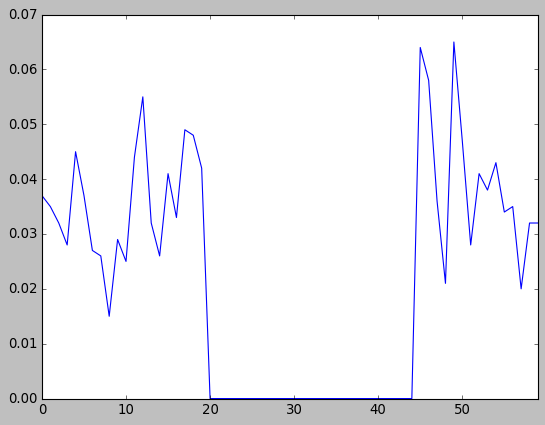

In [29]:
df['GSC_ch1'].plot(kind='line') # line, barh, box, scatter

A necessary requeiremnt for prophet to work, is that we change the columns names into ds for date and y for whatever the other column represents.

In [30]:
df.columns = ['ds','y']

In [31]:
df.head()

,ds,y
0,2018-02-06,0.037
1,2018-02-07,0.035
2,2018-02-08,0.032
3,2018-02-09,0.028
4,2018-02-10,0.045


In [8]:
m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
218,2018-09-12
219,2018-09-13
220,2018-09-14
221,2018-09-15
222,2018-09-16


In [10]:
future.head()

,ds
0,2018-02-06
1,2018-02-07
2,2018-02-08
3,2018-02-09
4,2018-02-10


In [11]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-06,0.001322,-0.003235,0.047895,0.001322,0.001322,0.020940,0.020940,0.020940,0.021754,0.021754,0.021754,-0.000814,-0.000814,-0.000814,0.0,0.0,0.0,0.022262
1,2018-02-07,0.001277,-0.006840,0.042773,0.001277,0.001277,0.017541,0.017541,0.017541,0.021754,0.021754,0.021754,-0.004213,-0.004213,-0.004213,0.0,0.0,0.0,0.018818
2,2018-02-08,0.001232,-0.008076,0.042997,0.001232,0.001232,0.017143,0.017143,0.017143,0.021754,0.021754,0.021754,-0.004612,-0.004612,-0.004612,0.0,0.0,0.0,0.018375
3,2018-02-09,0.001187,0.002967,0.053940,0.001187,0.001187,0.026634,0.026634,0.026634,0.021754,0.021754,0.021754,0.004880,0.004880,0.004880,0.0,0.0,0.0,0.027821
4,2018-02-10,0.001142,0.005423,0.054929,0.001142,0.001142,0.029087,0.029087,0.029087,0.021754,0.021754,0.021754,0.007333,0.007333,0.007333,0.0,0.0,0.0,0.030229


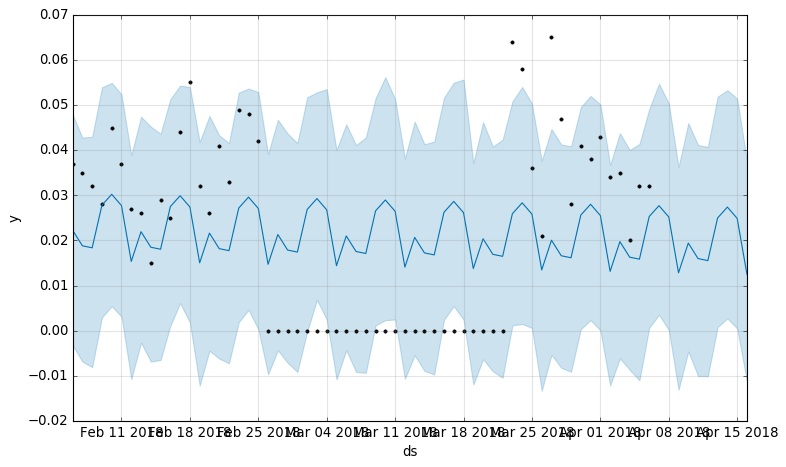

In [13]:
pd.plotting.register_matplotlib_converters()
fig1 = m.plot(forecast)

Usually (almost always) astronomers use a different format for the date. We called it Modified Julian Date (MJD). For example the MDJ = 58202 correspond to 2018-03-25.
In the first cell we imported *julian*, which converts for us the dates from MJD to UTC Y-M-D time format.

In [33]:
mjd = 58202
utc = julian.from_jd(mjd, fmt='mjd')
print(datetime.datetime.date(utc))

2018-03-25


Now, let's read a file where te first column is in MJD. Then we will use *julian* to change the date to UTS so we can let prophet can do its magic, like in the previous cells.

In [34]:
dd = pd.read_csv('XPer_daily_small_sample.txt', delimiter= ' ') 

In [35]:
dd.head()
#dd.columns = ['ds','y']

,MJD,GSC_ch1
0,58155.5,0.037
1,58156.5,0.035
2,58157.5,0.032
3,58158.5,0.028
4,58159.5,0.045


In [36]:
dd['MJD'] = [datetime.datetime.date(julian.from_jd(mjd, fmt='mjd')) for mjd in dd['MJD']]

In [37]:
dd['MJD']

0      2018-02-06
1      2018-02-07
2      2018-02-08
3      2018-02-09
4      2018-02-10
          ...    
208    2018-09-02
209    2018-09-03
210    2018-09-04
211    2018-09-05
212    2018-09-06
Name: MJD, Length: 213, dtype: object

In [38]:
dd.columns = ['ds','y']

In [39]:
dd.head()

,ds,y
0,2018-02-06,0.037
1,2018-02-07,0.035
2,2018-02-08,0.032
3,2018-02-09,0.028
4,2018-02-10,0.045


In [40]:
#dd.columns = ['ds','y']
m = Prophet(daily_seasonality=True)
m.fit(dd)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
218,2018-09-12
219,2018-09-13
220,2018-09-14
221,2018-09-15
222,2018-09-16


In [41]:
dd.tail()

,ds,y
208,2018-09-02,0.025
209,2018-09-03,0.035
210,2018-09-04,0.023
211,2018-09-05,-0.006
212,2018-09-06,0.024


In [23]:
future.iloc[208]

ds   2018-09-02
Name: 208, dtype: datetime64[ns]

In [24]:
forecast = m.predict(future)


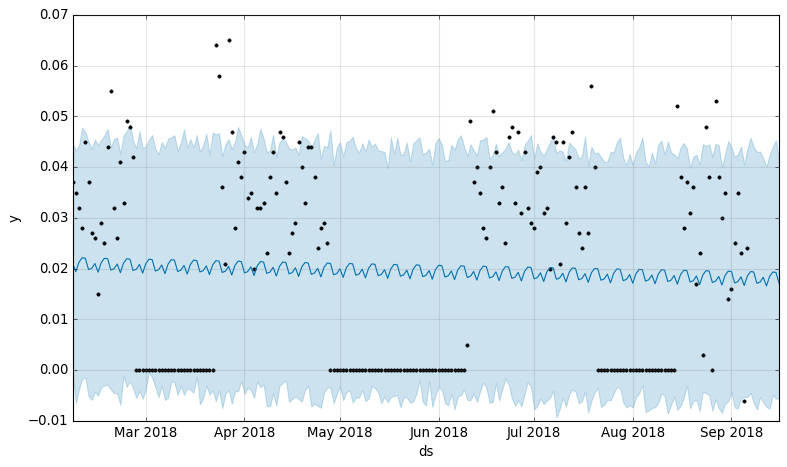

In [25]:
pd.plotting.register_matplotlib_converters()
fig1 = m.plot(forecast)